# API Data Wrangling with Open-Meteo

In this exercise, we will:

- Fetch historical weather data using the **Open-Meteo API**.
- Parse and clean the data using **pandas**.
- Perform exploratory data analysis.
- Visualize weather trends.

In [451]:
# Install required packages if not already installed
# !pip install requests pandas matplotlib --quiet

In [452]:
# Import Libraries
import requests
import pandas as pd
import matplotlib.pyplot as plt

# Optional: Configure matplotlib for inline display in Jupyter
%matplotlib inline

## Understand the Open-Meteo API

- **API Endpoint**: `https://archive-api.open-meteo.com/v1/archive`
- **Parameters**:
  - `latitude`: Latitude of the location.
  - `longitude`: Longitude of the location.
  - `start_date`: Start date of the data (YYYY-MM-DD).
  - `end_date`: End date of the data (YYYY-MM-DD).
  - `hourly`: Comma-separated list of variables (e.g., temperature, precipitation).
  - `timezone`: Timezone of the data.

**Documentation**: [Open-Meteo API Docs](https://open-meteo.com/en/docs)

In [453]:
# Step 1: Set Up Parameters

# Location coordinates for New York City
latitude = 40.7128
longitude = -74.0060

# Date range
start_date = '2023-01-01'
end_date = '2023-01-07'  # One week of data

# Variables to fetch
hourly_variables = ['temperature_2m', 'relativehumidity_2m', 'precipitation']


In [454]:
# Step 2: Make the API Request

base_url = 'https://archive-api.open-meteo.com/v1/archive'

params = {
    'latitude': latitude,
    'longitude': longitude,
    'start_date': start_date,
    'end_date': end_date,
    'hourly': ','.join(hourly_variables),
    'timezone': 'America/New_York'
}

response = requests.get(base_url, params=params)


In [455]:
# Check if the request was successful

if response.status_code == 200:
    print('Data fetched successfully!')
else:
    print(f'Failed to fetch data. Status code: {response.status_code}')


Data fetched successfully!


In [456]:
# Step 3: Load Data into pandas DataFrame

data = response.json()
hourly_data = data['hourly']

df = pd.DataFrame(hourly_data)
df.head()


,time,temperature_2m,relativehumidity_2m,precipitation
0,2023-01-01T00:00,10.7,99,1.0
1,2023-01-01T01:00,10.5,99,1.0
2,2023-01-01T02:00,10.4,98,0.1
3,2023-01-01T03:00,10.3,96,0.0
4,2023-01-01T04:00,9.7,95,0.0


In [457]:
# Step 4: Data Cleaning

# Convert 'time' column to datetime
df['time'] = pd.to_datetime(df['time'])

# Set 'time' as the index
df.set_index('time', inplace=True)

# Check for missing values
df.isnull().sum()


temperature_2m         0
relativehumidity_2m    0
precipitation          0
dtype: int64

In [458]:
# Handle missing values (if any)
df.ffill(inplace=True)  # Forward fill


In [459]:
# Step 5: Exploratory Data Analysis

# Summary Statistics
df.describe()

,temperature_2m,relativehumidity_2m,precipitation
count,168.000000,168.000000,168.000000
mean,8.371429,86.422619,0.142857
std,3.495063,12.799933,0.436037
min,0.400000,45.000000,0.000000
25%,5.900000,81.000000,0.000000
50%,8.250000,90.500000,0.000000
75%,11.100000,97.000000,0.000000
max,17.900000,100.000000,3.100000


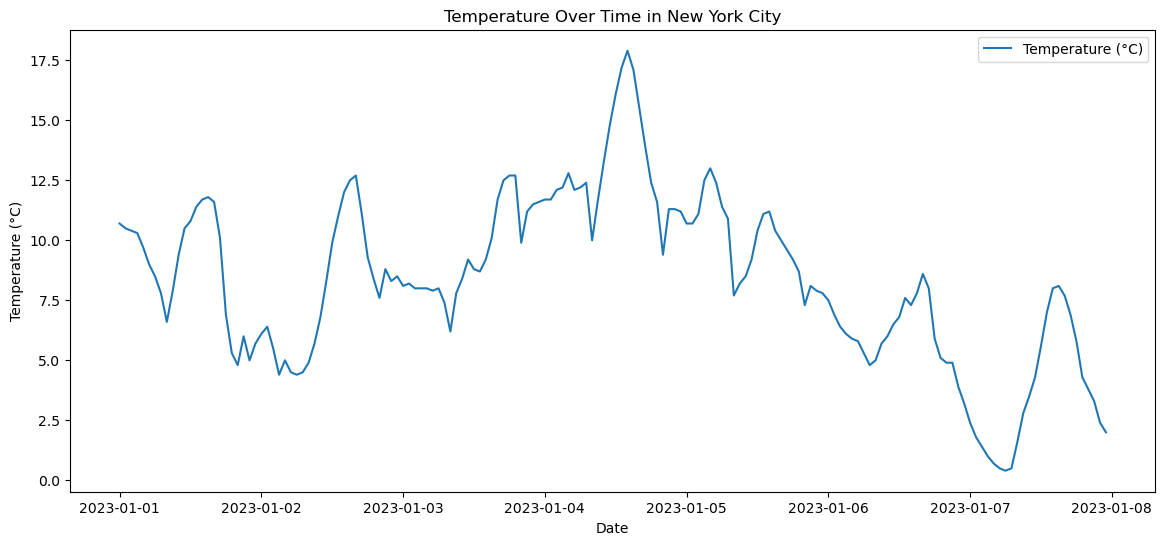

In [460]:
# Plot Temperature Over Time

plt.figure(figsize=(14, 6))
plt.plot(df.index, df['temperature_2m'], label='Temperature (°C)')
plt.title('Temperature Over Time in New York City')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.show()

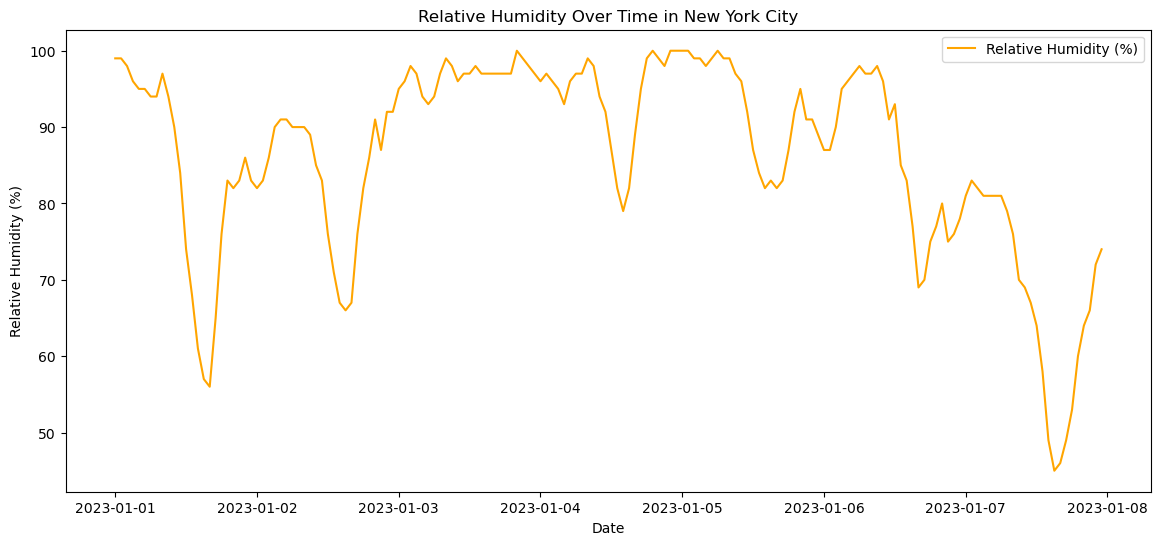

In [461]:
# Plot Relative Humidity Over Time

plt.figure(figsize=(14, 6))
plt.plot(df.index, df['relativehumidity_2m'], color='orange', label='Relative Humidity (%)')
plt.title('Relative Humidity Over Time in New York City')
plt.xlabel('Date')
plt.ylabel('Relative Humidity (%)')
plt.legend()
plt.show()


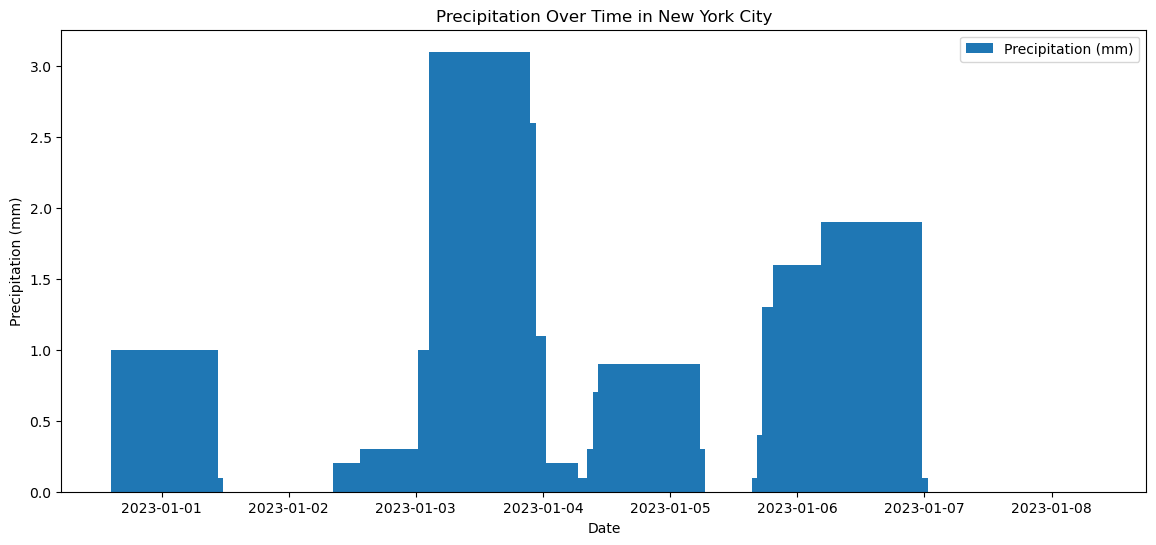

In [462]:
# Plot Precipitation Over Time

plt.figure(figsize=(14, 6))
plt.bar(df.index, df['precipitation'], label='Precipitation (mm)')
plt.title('Precipitation Over Time in New York City')
plt.xlabel('Date')
plt.ylabel('Precipitation (mm)')
plt.legend()
plt.show()


In [463]:
# Step 6: Correlation Analysis

# Calculate correlation between temperature and humidity
correlation = df['temperature_2m'].corr(df['relativehumidity_2m'])
print(f'Correlation between Temperature and Relative Humidity: {correlation:.2f}')


Correlation between Temperature and Relative Humidity: 0.24


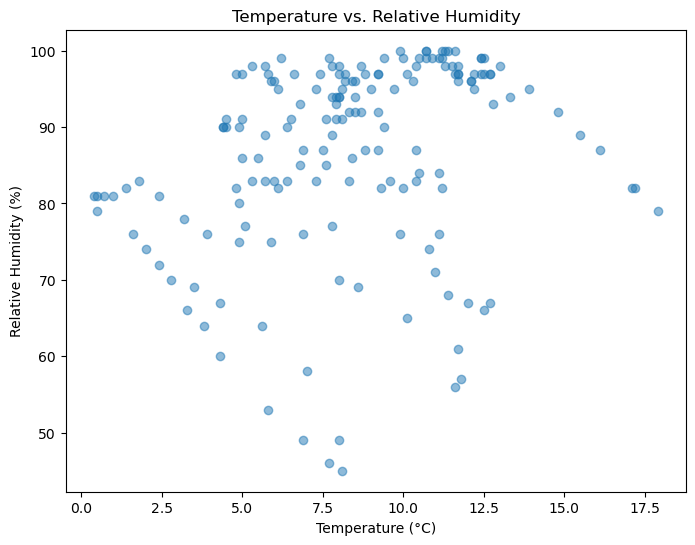

In [464]:
# Scatter Plot of Temperature vs. Relative Humidity

plt.figure(figsize=(8, 6))
plt.scatter(df['temperature_2m'], df['relativehumidity_2m'], alpha=0.5)
plt.title('Temperature vs. Relative Humidity')
plt.xlabel('Temperature (°C)')
plt.ylabel('Relative Humidity (%)')
plt.show()


In [465]:
# Step 7: Resample Data to Daily Averages

daily_avg = df.resample('D').mean()
daily_avg.head()


,temperature_2m,relativehumidity_2m,precipitation
time,,,
2023-01-01,8.850000,83.708333,0.087500
2023-01-02,7.775000,83.458333,0.020833
2023-01-03,9.408333,96.875000,0.395833
2023-01-04,12.995833,94.166667,0.095833
2023-01-05,9.916667,92.666667,0.000000


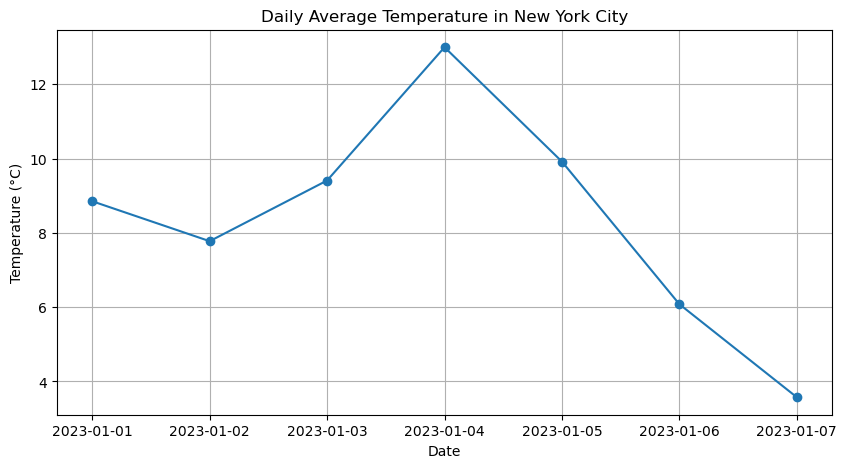

In [466]:
# Plot Daily Average Temperature

plt.figure(figsize=(10, 5))
plt.plot(daily_avg.index, daily_avg['temperature_2m'], marker='o')
plt.title('Daily Average Temperature in New York City')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.grid(True)
plt.show()


In [467]:
# Step 8: Compare with Another Location (Los Angeles)

# Coordinates for Los Angeles
latitude_la = 34.0522
longitude_la = -118.2437

params_la = {
    'latitude': latitude_la,
    'longitude': longitude_la,
    'start_date': start_date,
    'end_date': end_date,
    'hourly': ','.join(hourly_variables),
    'timezone': 'America/Los_Angeles'
}

response_la = requests.get(base_url, params=params_la)

# Load and clean Los Angeles data
data_la = response_la.json()
hourly_data_la = data_la['hourly']
df_la = pd.DataFrame(hourly_data_la)

df_la['time'] = pd.to_datetime(df_la['time'])
df_la.set_index('time', inplace=True)
df_la.ffill(inplace=True)


In [468]:
# Resample Los Angeles Data to Daily Averages

daily_avg_la = df_la.resample('D').mean()


In [469]:
# Combine DataFrames for Comparison

combined_temp = pd.DataFrame({
    'New York': daily_avg['temperature_2m'],
    'Los Angeles': daily_avg_la['temperature_2m']
})


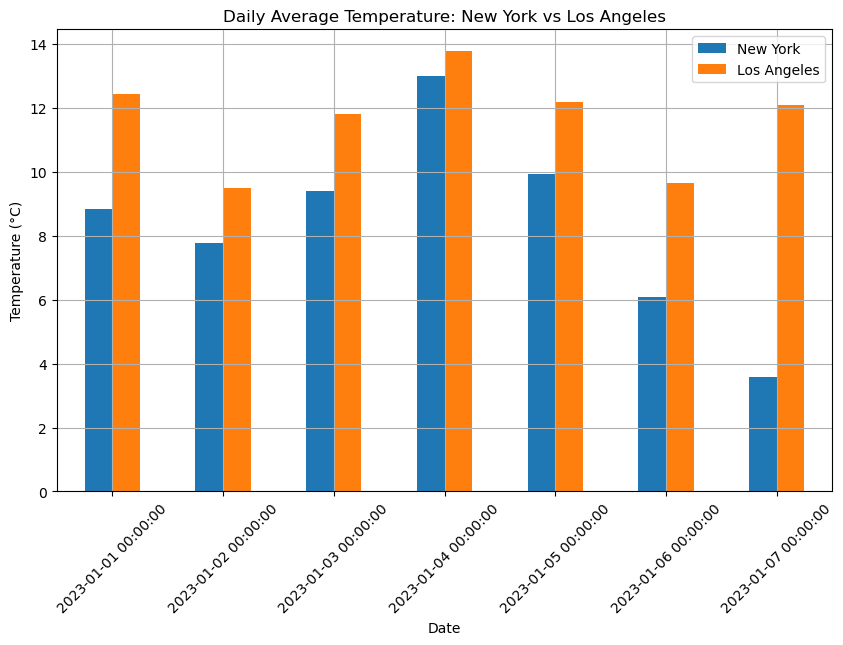

In [470]:
# Plot Comparison of Daily Average Temperature

combined_temp.plot(kind='bar', figsize=(10, 6))
plt.title('Daily Average Temperature: New York vs Los Angeles')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [471]:
# Step 9: Advanced Analysis - Temperature Difference

# Calculate Temperature Difference
combined_temp['Temp Difference'] = combined_temp['Los Angeles'] - combined_temp['New York']
combined_temp


,New York,Los Angeles,Temp Difference
time,,,
2023-01-01,8.850000,12.433333,3.583333
2023-01-02,7.775000,9.483333,1.708333
2023-01-03,9.408333,11.808333,2.400000
2023-01-04,12.995833,13.766667,0.770833
2023-01-05,9.916667,12.183333,2.266667
2023-01-06,6.079167,9.662500,3.583333
2023-01-07,3.575000,12.095833,8.520833


In [472]:
# Step 10: Save Data to CSV (Optional)

# Save New York data
df.to_csv('new_york_weather.csv')

# Save Los Angeles data
df_la.to_csv('los_angeles_weather.csv')


## Conclusion

In this exercise, we:

- Accessed and retrieved data from the **Open-Meteo API**.
- Cleaned and preprocessed JSON data using **pandas**.
- Performed exploratory data analysis and visualization.
- Compared weather patterns between **New York City** and **Los Angeles**.

---

**Next Steps**:

- **Extend the Date Range**: Analyze seasonal trends by fetching data over several months.
- **Fetch Additional Variables**: Include wind speed, atmospheric pressure, or other interesting variables.
- **Forecasting**: Use statistical methods or machine learning models to forecast future weather patterns.
- **Global Analysis**: Compare data from other global cities to gain broader insights.


## Exercises for Students

Now it's your turn! Below are some exercises to reinforce what you've learned. Try to complete them without looking at the solutions.

### Exercise: Compare Rainfall Between London and Seattle

- **Objective**: Compare the total weekly rainfall between London and Seattle over a full year.
- **Tasks**:
  1. **Fetch Data**: Retrieve hourly precipitation data for London and Seattle for the year 2022.
     - **London Coordinates**: Latitude `51.5074`, Longitude `-0.1278`
     - **Seattle Coordinates**: Latitude `47.6062`, Longitude `-122.3321`
  2. **Data Cleaning**: Convert the time columns to datetime objects and set them as the index. Handle any missing values.
  3. **Resample Data**: Resample the hourly data to weekly totals.
  4. **Visualization**: Plot the weekly total precipitation for both cities on the same graph.
  5. **Analysis**: Determine which city had more rainfall overall and identify any interesting patterns.

**Note**: Remember to handle any API limitations, such as data availability or rate limits, and to be mindful of the size of the data you're requesting.

### Tips:

- **API Parameters**: Make sure to adjust the parameters like `latitude`, `longitude`, `start_date`, `end_date`, `hourly`, and `timezone` as needed.
- **Error Handling**: Always check if your API requests are successful before proceeding.
- **Data Storage**: Consider saving your DataFrames to CSV files for future analysis.
- **Visualization**: Customize your plots with titles, labels, legends, and gridlines for better readability.

Happy coding!


In [473]:
# Coordinates for London
London_latitude = 51.5074
London_longitude = -0.1278

# Coordinates for Seattle
Seattle_latitude = 47.6062
Seattle_longitude = -122.3321

# Date range
start_date = '2022-01-01'
end_date = '2022-12-31' # one year of data

# Variables to fetch
hourly_variables = ['precipitation']

In [474]:
base_url = 'https://archive-api.open-meteo.com/v1/archive'

London_params = {
    'latitude': London_latitude,
    'longitude': London_longitude,
    'start_date': start_date,
    'end_date': end_date,
    'hourly': ','.join(hourly_variables),
    'timezone': 'Europe/London'
}

Seattle_params = {
    'latitude': Seattle_latitude,
    'longitude': Seattle_longitude,
    'start_date': start_date,
    'end_date': end_date,
    'hourly': ','.join(hourly_variables),
    'timezone': 'America/Los_Angeles'
}

London_response = requests.get(base_url, params=London_params)
Seattle_response = requests.get(base_url, params=Seattle_params)

In [475]:
# Check if the requests were successful

if London_response.status_code == 200:
    print('London precipitation data fetched successfully!')
else:
    print(f'Failed to fetch data for London. Status code: {London_response.status_code}')

if Seattle_response.status_code == 200:
    print('Seattle precipitation data fetched successfully!')
else:
    print(f'Failed to fetch data for Seattle. Status code: {Seattle_response.status_code}')

London precipitation data fetched successfully!
Seattle precipitation data fetched successfully!


In [476]:
# Load data into pandas DataFrames

London_data = London_response.json()
London_hourly_data = London_data['hourly']

L_df = pd.DataFrame(London_hourly_data)
L_df.tail()

,time,precipitation
8755,2022-12-31T19:00,0.2
8756,2022-12-31T20:00,0.0
8757,2022-12-31T21:00,0.0
8758,2022-12-31T22:00,0.0
8759,2022-12-31T23:00,0.3


In [477]:
Seattle_data = Seattle_response.json()
Seattle_hourly_data = Seattle_data['hourly']

S_df = pd.DataFrame(Seattle_hourly_data)
S_df.tail()

,time,precipitation
8755,2022-12-31T19:00,0.0
8756,2022-12-31T20:00,0.0
8757,2022-12-31T21:00,0.0
8758,2022-12-31T22:00,0.0
8759,2022-12-31T23:00,0.0


In [478]:
# Convert London df 'time' column to datetime
L_df['time'] = pd.to_datetime(L_df['time'])

# Set 'time' as the index
L_df.set_index('time', inplace=True)

L_df.head()

,precipitation
time,
2022-01-01 00:00:00,0.0
2022-01-01 01:00:00,0.0
2022-01-01 02:00:00,0.0
2022-01-01 03:00:00,0.0
2022-01-01 04:00:00,0.0


In [479]:
# Check London df for missing values
L_df.isnull().sum()

precipitation    0
dtype: int64

In [480]:
# Convert Seattle df 'time' column to datetime
S_df['time'] = pd.to_datetime(S_df['time'])

# Set 'time' as the index
S_df.set_index('time', inplace=True)

S_df.head()

,precipitation
time,
2022-01-01 00:00:00,0.0
2022-01-01 01:00:00,0.0
2022-01-01 02:00:00,0.0
2022-01-01 03:00:00,0.0
2022-01-01 04:00:00,0.0


In [481]:
# Check Seattle df for missing values
S_df.isnull().sum()

precipitation    0
dtype: int64

In [482]:
# Forward fill missing values just in case
L_df.ffill(inplace=True)
S_df.ffill(inplace=True)

In [483]:
# Save the DataFrames to csv files
L_df.to_csv('London_hourly_precipitation_2022.csv')
S_df.to_csv('Seattle_hourly_precipitation_2022.csv')

In [484]:
# Resampling to get weekly precipitiation totals
L_df_weekly = L_df.resample('7d').sum()
L_df_weekly.to_csv('London_weekly_precipitation_2022.csv')

S_df_weekly = S_df.resample('7d').sum()
S_df_weekly.to_csv('Seattle_weekly_precipitation_2022.csv')

In [485]:
L_df_weekly.describe()

,precipitation
count,53.000000
mean,12.505660
std,13.500106
min,0.000000
25%,2.300000
50%,7.200000
75%,15.200000
max,61.700000


In [486]:
L_df_weekly.head()

,precipitation
time,
2022-01-01,7.2
2022-01-08,11.0
2022-01-15,0.0
2022-01-22,0.0
2022-01-29,5.2


In [487]:
S_df_weekly.describe()

,precipitation
count,53.000000
mean,21.343396
std,28.410775
min,0.000000
25%,1.700000
50%,11.500000
75%,32.200000
max,140.000000


In [488]:
S_df_weekly.head()

,precipitation
time,
2022-01-01,140.0
2022-01-08,45.6
2022-01-15,15.7
2022-01-22,0.0
2022-01-29,11.5


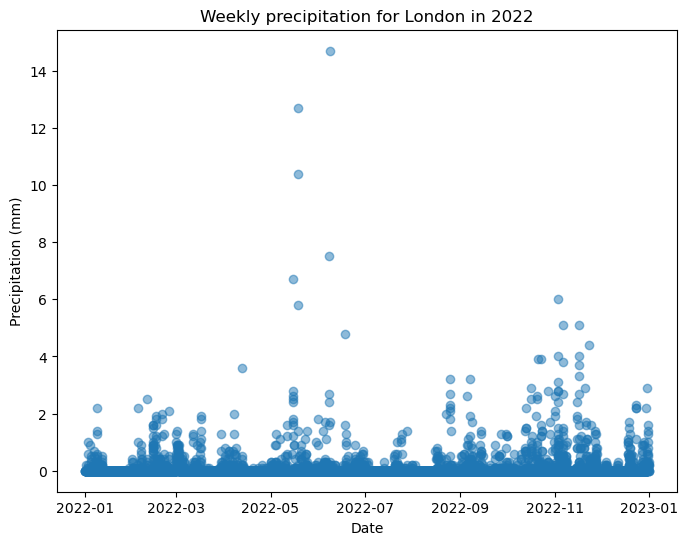

In [489]:
# Scatter Plot of weekly precipitation in London

plt.figure(figsize=(8, 6))
plt.scatter(L_df.index, L_df['precipitation'], alpha=0.5)
plt.title('Weekly precipitation for London in 2022')
plt.xlabel('Date')
plt.ylabel('Precipitation (mm)')
plt.show()

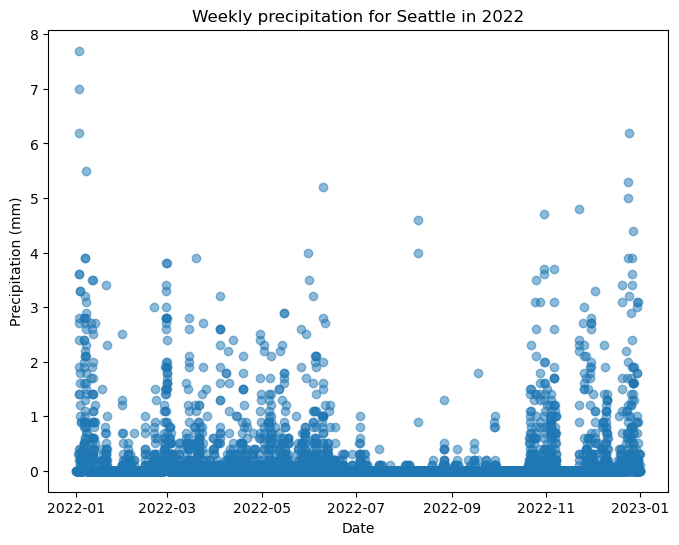

In [490]:
# Scatter Plot of weekly precipitation in Seattle

plt.figure(figsize=(8, 6))
plt.scatter(S_df.index, S_df['precipitation'], alpha=0.5)
plt.title('Weekly precipitation for Seattle in 2022')
plt.xlabel('Date')
plt.ylabel('Precipitation (mm)')
plt.show()

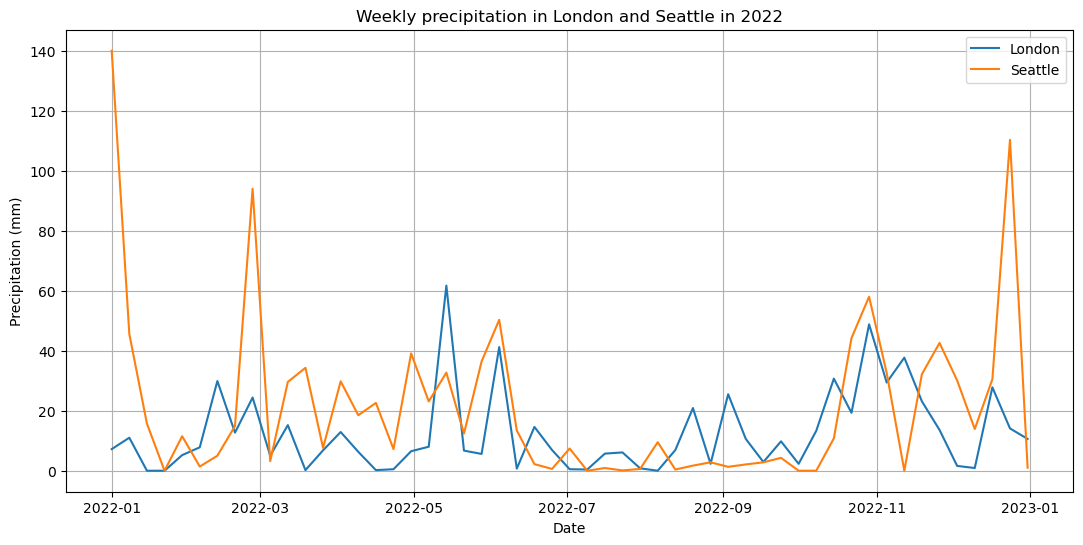

In [491]:
# Plot weekly precipitation

plt.figure(figsize=(13, 6))
plt.plot(L_df_weekly.index, L_df_weekly['precipitation'], label ='London')
plt.plot(S_df_weekly.index, S_df_weekly['precipitation'], label ='Seattle')
plt.title('Weekly precipitation in London and Seattle in 2022')
plt.xlabel('Date')
plt.ylabel('Precipitation (mm)')
plt.legend()
plt.grid(True)
plt.show()

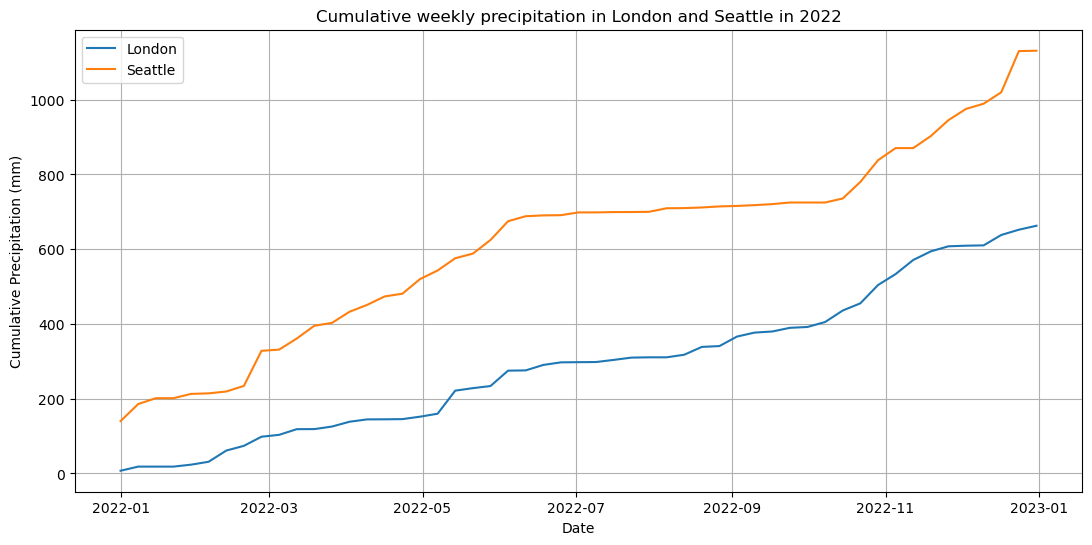

In [493]:
import numpy as np

# Get sample data into arrays 
data_L = np.array(L_df_weekly['precipitation'])
data_S = np.array(S_df_weekly['precipitation'])

# Calculate cumulative sums
cumulative_data_L = np.cumsum(data_L)
cumulative_data_S = np.cumsum(data_S)

# Plot the cumulative precipitation data
plt.figure(figsize=(13, 6))
plt.plot(L_df_weekly.index, cumulative_data_L, label = 'London')
plt.plot(S_df_weekly.index, cumulative_data_S, label = 'Seattle')
plt.title('Cumulative weekly precipitation in London and Seattle in 2022')
plt.xlabel("Date")
plt.ylabel("Cumulative Precipitation (mm)")
plt.legend()
plt.grid(True)
plt.show()